# Taller 3

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad se considera entregada para calificación cuando el *cuaderno* de jupyter notebook con extensión `.ipynb` se sube al espacio correspondiente en el aula de Bloque Neón. Ningún material adicional será revisado.

4. La solución del taller debe ser realizado en las mismas **parejas** con las que realizó el Taller 1. No se aceptaran talleres de individuales. En caso de no tener un equipo asignado, informar al equipo docente.

5. El cuaderno debe poderse correr sin errores al momento de evaluar.

## Criterios de evaluación.
A grandes rasgos, en cada uno de los incisos se evaluará su solución y se espera que sea igual a la estipulada en el enunciado. Adicionalmente, su calificación podrá ser penalizada por los siguientes items:

- Falta de seguimiento de las instrucciones.
- Código no-human readable. 
- Falta de una debida explicación y comentarios al código.

A continuación se listan los puntajes máximos para cada punto:
| **Punto** | **Puntaje Máximo** |
|:---------:|:------------------:|
|    1      |         2.0        |
|     2     |         3.0        |


Este Taller evalúa los tópicos de webscraping y tiene el valor de un 20% en su calificación final.

# 1. Scraping Win Sports
Ingrese a la página web [www.winsports.co](https://www.winsports.co/) y realice un código en Python que haga un webscraping de la tabla de posiciones de la **Liga BetPlay Dimayor 2024-II**. El resultado final debe ser un dataframe

In [3]:
pip install selenium

     ---------------------------------------- 9.7/9.7 MB 34.5 MB/s eta 0:00:00
     ---------------------------------------- 58.8/58.8 kB ? eta 0:00:00
     ------------------------------------- 481.7/481.7 kB 15.2 MB/s eta 0:00:00
     ---------------------------------------- 63.0/63.0 kB ? eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB ? eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 0.58.0
    Uninstalling websocket-client-0.58.0:
      Successfully uninstalled websocket-client-0.58.0
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: sniffio
    Found existing installation: sniffio 1.2.0
    Uninstalling sniffio-1.2.0:
      Successfully uninstalled sniffio-1.2.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
import numpy as np
from selenium.webdriver.common.by import By
from lxml import etree


In [57]:
url_winsports = 'https://www.winsports.co/'
r = requests.get(url_winsports)

In [42]:
# Verificamos que todo esté ok
r.status_code == 200

True

In [43]:
# Vamos a convertirlo en un formato más amigable para Python
soup = BeautifulSoup(r.content)

In [50]:
links = soup.find_all("a")
[i.text for i in links]

[' Pasar al contenido principal ',
 ' Menú',
 '  ',
 'Inicio',
 'Tablas de posiciones',
 'Fútbol Colombiano',
 'Liga BetPlay Dimayor',
 'Torneo BetPlay Dimayor',
 'Superliga BetPlay 2024',
 'Copa BetPlay Dimayor',
 'Liga Femenina',
 'Más Fútbol Colombiano',
 'Fútbol de barrio',
 'Fútbol Internacional',
 'Copa Libertadores',
 'Copa Sudamericana',
 'La Liga España',
 'La Ligue 1',
 'Liga Profesional Argentina',
 'Premier League',
 'Serie A',
 'UEFA Champions League',
 'UEFA Europa League',
 'Liga Profesional Saudí',
 'Más fútbol internacional',
 'Ciclismo',
 'Más Deportes',
 'Opinión',
 'Selección Colombia',
 'Mira aquí los partidos',
 'Goles',
 'Programación',
 'Posiciones',
 ' Ver goles ',
 ' Comprar partido ',
 ' Cuotas aquí ',
 ' Cuotas aquí ',
 ' Cuotas aquí ',
 'Ver todo',
 '',
 '¡Se estrelló en el palo! Real Cartagena casi abre el marcador ',
 '',
 '⚽¡Igualdad en Techo! Revive los goles de R.Cundinamarca y Cúcuta',
 '',
 '⚽Así fueron los goles del importante triunfo de Unión Magda

In [51]:
str(links)

'[<a class="visually-hidden focusable" href="#main-content"> Pasar al contenido principal </a>, <a aria-label="Menu" class="toggle responsive-menu-toggle-icon" href="#off-canvas" id="toggle-icon" title="Menu"> <span class="icon"></span><span class="label">Menú</span></a>, <a class="mr-2 site-logo" href="/" rel="home" title="Inicio"> <img alt="Inicio" src="https://files.winsports.co/assets/public/Win_Nuevo_WEB_02_0.png"/> </a>, <a data-drupal-link-system-path="&lt;front&gt;" href="/">Inicio</a>, <a data-drupal-link-system-path="node/101761" href="/posiciones/liga-betplay-dimayor-2024-ii">Tablas de posiciones</a>, <a data-drupal-link-system-path="node/101757" href="/estadisticas/posiciones/liga-betplay-dimayor-2024-ii">Fútbol Colombiano</a>, <a data-drupal-link-system-path="node/101757" href="/estadisticas/posiciones/liga-betplay-dimayor-2024-ii">Liga BetPlay Dimayor</a>, <a data-drupal-link-system-path="node/101745" href="/estadisticas/posiciones/torneo-betplay-dimayor-2024-ii">Torneo B

In [6]:
url2 = "https://www.winsports.co/posiciones/liga-betplay-dimayor-2024-ii"

In [8]:
driver = webdriver.Edge()
driver.get(url2)

In [32]:
nombres_column = driver.find_elements(By.XPATH, '//div[contains(@class, "tw-border-b tw-border-light-gray")]')
equipos = driver.find_elements(By.XPATH, '//div[contains(@class, "tw-truncate")]')
posiciones = driver.find_elements(By.XPATH, '//div[contains(@class, "tw-w-[4ch]")]')
contenido_tabla = driver.find_elements(By.CLASS_NAME, 'tw-flex-1')

In [33]:
# Convertimos a los objetos en listas de strings
nombres_column = [nombres_column.text for nombres_column  in nombres_column]
equipos = [equipo.text for equipo in equipos]
contenido_tabla = [contenido_tabla.text for contenido_tabla in contenido_tabla]
posiciones = [posiciones.text for posiciones in posiciones]

In [34]:
print(nombres_column)
print(equipos )
print(contenido_tabla)
print(posiciones)

['Equipos\nJugados\nVictorias\nDerrotas\nEmpates\nDiferencia de goles\nPuntos', '', '']
['Independiente Santa Fe', 'América de Cali', 'Millonarios', 'Atlético Nacional', 'Deportes Tolima', 'Once Caldas', 'Junior', 'Deportivo Pasto', 'Fortaleza CEIF', 'Independiente Medellín', 'Atlético Bucaramanga', 'Deportivo Pereira', 'La Equidad', 'Patriotas Boyacá', 'Águilas Doradas', 'Alianza', 'Deportivo Cali', 'Jaguares de Córdoba', 'Boyacá Chicó', 'Envigado']
['Jugados', 'Victorias', 'Derrotas', 'Empates', 'Diferencia de goles', 'Puntos', '18', '9', '2', '7', '11', '34', '18', '10', '4', '4', '8', '34', '18', '9', '4', '5', '10', '32', '18', '9', '4', '5', '8', '32', '18', '9', '5', '4', '12', '31', '18', '9', '5', '4', '5', '31', '18', '7', '4', '7', '7', '28', '18', '8', '7', '3', '6', '27', '18', '7', '5', '6', '4', '27', '18', '6', '4', '8', '7', '26', '18', '7', '7', '4', '0', '25', '18', '6', '6', '6', '0', '24', '18', '5', '6', '7', '-5', '22', '18', '5', '8', '5', '-5', '20', '18', '4',

In [35]:
# Arreglamos nombres_colum (es una lista de tres elementos)
nombres_column = [i for sublist in nombres_column if sublist for i in sublist.split('\n')]


## Arreglamos contenido tablas
contenido_tabla = list(filter(lambda x: x != "", contenido_tabla))

In [36]:
### Convertimos contenido tablas en un array
mat_tabla = np.array(contenido_tabla).reshape(-1, 6)
mat_tabla = mat_tabla[1:]


In [37]:
#Juntamos posicion y nombre del equipo en una sola variable (tal y como esta en la pagina web)
equipo_pos = np.char.add(np.char.add(posiciones,' '), equipos)

In [38]:
#Juntamos todo en un datafame
df_ligacol = pd.DataFrame(mat_tabla, columns=nombres_column[1:])
df_ligacol.insert(0, nombres_column[0], equipo_pos)

In [39]:
#Observamos datframe
df_ligacol

,Equipos,Jugados,Victorias,Derrotas,Empates,Diferencia de goles,Puntos
0,1 Independiente Santa Fe,18,9,2,7,11,34
1,2 América de Cali,18,10,4,4,8,34
2,3 Millonarios,18,9,4,5,10,32
3,4 Atlético Nacional,18,9,4,5,8,32
4,5 Deportes Tolima,18,9,5,4,12,31
5,6 Once Caldas,18,9,5,4,5,31
6,7 Junior,18,7,4,7,7,28
7,8 Deportivo Pasto,18,8,7,3,6,27
8,9 Fortaleza CEIF,18,7,5,6,4,27
9,10 Independiente Medellín,18,6,4,8,7,26


# 2. Scraping Metro Cuadrado
Ingrese a la página web de Metro Cuadrado y filtre su busqueda para quedarse solo con los apartamentos en arriendo en Chapinero, Bogotá ([este link](https://www.metrocuadrado.com/arriendo/bogota/chapinero/?search=form)). 

### 2.1. Encuentre su universo de trabajo.
Cree un webscraping que extraiga todos los hipervínculos de los apartamentos en arriendo en Bogotá (un poco más de 500 inmuebles). Luego consolide toda esta información en una lista.

Para realizar esto puede tomar dos caminos:
- Camino A. Entrar al menu de `Inspect` > `Network` y buscar el request específico que trae la información a la página. Para que este funcione adecuadamente, tendrá que reconstruir el `Request Headers`. 
- Camino B. Utilizar Selenium para replicar el comportamiento de un humano que navega la página web. Este método es más intuitivo de programar pero será menos eficiente y susceptible a errores de red.

Para cualquiera de los dos caminos, note que tendrá que navegar por varios requests o varios clicks para poder recolectar todos los inmuebles. En caso de que esto se le dificulte, trate de realizar por lo menos un subconjunto de la tarea completa primero. 

In [40]:
metro_cuadrado = "https://www.metrocuadrado.com/arriendo/bogota/chapinero/?search=form"
r = requests.get(metro_cuadrado)
r.status_code==200


True

<!DOCTYPE html>
<html lang="es"><head><meta content="width=device-width,minimum-scale=1,initial-scale=1" name="viewport"/><meta charset="utf-8"/><meta content="summary_large_image" name="twitter:card"/><meta content="@metrocuadrado" name="twitter:site"/><meta content="@metrocuadrado" name="twitter:creator"/><meta content="website" property="og:type"/><meta content="https://www.metrocuadrado.com/estatico/metrocuadrado-home/default/image/desktop.jpg" property="og:image"/><meta content="https://www.metrocuadrado.com/" property="og:image:alt"/><meta content="metrocuadrado.com" property="og:site_name"/><link href="/results/style.css" rel="stylesheet"/><link href="/results/favicon.ico" rel="icon" type="image/x-icon"/><link href="/results/favicon.ico" rel="shortcut icon" type="image/x-icon"/><script async="" src="https://tags.tiqcdn.com/utag/adl/proptech/prod/utag.js" type="text/javascript"></script><script src="https://tags.tiqcdn.com/utag/adl/proptech/prod/utag.sync.js"></script><title>Inmu
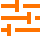
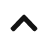
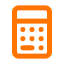
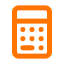
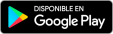
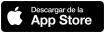
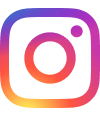

In [41]:
soup = BeautifulSoup(r.content)
soup

[<a class="A-sc-70cat-0 dlmcsa Brand-sc-1hl18p-0 cgZDOB logo navbar-brand" href="/"></a>,
 <a aria-expanded="false" aria-haspopup="true" class="A-sc-70cat-0 dlmcsa dropdown-toggle nav-link text-primary" data-toggle="dropdown" href="#">Buscar Inmuebles</a>,
 <a aria-expanded="false" aria-haspopup="true" class="A-sc-70cat-0 dlmcsa dropdown-toggle nav-link text-primary" data-toggle="dropdown" href="#">Noticias y Tendencias</a>,
 <a class="A-sc-70cat-0 dlmcsa navbar-links text-left" data-gtm-title="Noticias y Tendencias" href="/noticias/">Noticias</a>,
 <a class="A-sc-70cat-0 dlmcsa navbar-links text-left" data-gtm-title="Noticias y Tendencias" href="/noticias/economia/">Economia</a>,
 <a class="A-sc-70cat-0 dlmcsa navbar-links text-left" data-gtm-title="Noticias y Tendencias" href="/noticias/decoracion/">Decoración</a>,
 <a class="A-sc-70cat-0 dlmcsa navbar-links text-left" data-gtm-title="Noticias y Tendencias" href="/noticias/arquitectura/">Arquitectura</a>,
 <a class="A-sc-70cat-0 dlmc
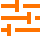
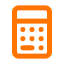
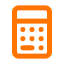
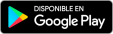
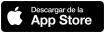
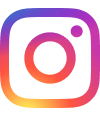

In [44]:
links = soup.find_all("a")
links

### 2.2. Descargue la información.
Haga otro webscraping que vaya iterando sobre cada uno de los elementos de la lista de inmuebles y extraiga la información relevante del inmueble. Construya un dataframe con sus resultados.

2.3. Grafique los resultados.
- Cree un histograma que permita visualizar la distribución de los precios por metro cuadrado. 
- Cree una gráfica que le permita comparar las distribuciones de los precios por estrato.
- Cree una gráfica que le permita comparar las distribuciones de los precios por antigüedad del edifico.

3. Bono
Encuentre la latitud y longitud de cada uno de los apartamentos de su muestra utilizando webscraping. Grafique los resultados en un mapa de Bogotá.

Describa (no tiene que hacerlo) cómo podría construir una medida de valor de metro cuadrado por cuadra en Chapinero.